# Introdução

Aqui veremos uma análise de dados financeiros e de performance de uma empresa fictícia, para mostrar as capacidades de análise e visualização de dados no Python, através dos pacotes [pandas](https://pandas.pydata.org/) e [matplotlib](https://matplotlib.org/). A empresa possui os seguintes dados:

- *Visitas*: Base de quantas visitas temos no site, separadas por departamento, produto e região do país
- *Vendas*: Base de quantas vendas tivemos, separadas por departamento, produto e região do país
- *Financeiro*: Dados financeiros da venda, como receita com preço (após descontos), receita com frete (após descontos), custo do produto, custo de entrega, gastos com marketing e descontos dados em preço e frete.

Propõe-se uma análise dos indicadores de performance da empresa, considerando as informações disponíveis. Vamos importar os pacotes necessários e os dados:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fin = pd.read_csv('~/Downloads/Financeiro.csv', sep=';', encoding='windows-1252', decimal=b',')
ven = pd.read_csv('~/Downloads/Vendas.csv', sep=';', encoding='windows-1252', decimal=b',')
vis = pd.read_csv('~/Downloads/visitas.csv', sep=';', encoding='windows-1252', decimal=b',')

df = pd.merge(fin, ven)
df = pd.merge(df, vis)
df.Mes = pd.to_datetime(df.Mes)

Uma amostra da base de dados inicial, com dados do setor financeiro, de vendas e visitas:

In [3]:
df.head()

,Mes,Departamento,UF,Item,Faturamento_Produto,Faturamento_Frete,Custo_Produto,Custo_Frete,Custo_Mkt,Desconto_Produto,Desconto_Frete,Vendas,Visitas
0,2018-06-01,Cadeiras,SP,1,149250.0,42984.0,71640,35820,5970,0.0,4776.0,590,14304
1,2018-06-01,Cadeiras,SP,2,148050.0,30456.0,76140,25380,4230,0.0,3384.0,439,14258
2,2018-06-01,Cadeiras,SP,3,133650.0,21384.0,89100,17820,2970,0.0,2376.0,292,14325
3,2018-07-01,Cadeiras,SP,1,314712.5,94784.0,177720,88860,74050,55537.5,23696.0,1469,14873
4,2018-07-01,Cadeiras,SP,2,392105.0,84352.0,237240,79080,65900,69195.0,21088.0,1333,14849


Agora, vamos calcular faturamentos, custos e descontos totais, bem como os lucros de produto, frete e o lucro líquido:

$F_{bruto} = F_{produto} + F_{frete}$ (faturamentos)

$C_{total} = C_{produto} + C_{frete} + C_{mkt}$ (custos)

$D_{total} = D_{produto} + D_{frete}$ (descontos)

Os lucros:

$L_{produto} = F_{produto} - C_{produto} - D_{produto}$ (produto)

$L_{frete} = F_{frete} - C_{frete} - D_{frete}$ (fretes)

$L_{liquido} = F_{bruto} - C_{total} - D_{total}$ (líquido)

A seguir, calcula-se o custo marginal (o custo de se ofertar uma unidade a mais) dos itens pela relação:

$C_{marginal} = \frac{C_{total}}{\textrm{Vendas}}$

Podemos inferir o preço médio praticado, através da razão entre o faturamento bruto e as quantidades vendidas:

$P_{médio} = \frac{F_{bruto}}{\textrm{Vendas}}$

Agora, sabendo o custo marginal e o preço dos itens, podemos calcular as margens de lucro (_mark-ups_) em porcentagem:

$M = \frac{P_{médio}-C_{marginal}}{P_{médio}} * 100$

In [4]:
df['Faturamento_Bruto'] = df.Faturamento_Produto + df.Faturamento_Frete
df['Custo_Total']       = df.Custo_Produto + df.Custo_Frete + df.Custo_Mkt
df['Desconto_Total']    = df.Desconto_Frete + df.Desconto_Produto

df['Lucro_Produto'] = df.Faturamento_Produto - df.Custo_Produto - df.Desconto_Produto
df['Lucro_Frete']   = df.Faturamento_Frete - df.Custo_Frete - df.Desconto_Frete
df['Lucro_Liquido'] = df.Faturamento_Bruto - df.Custo_Total - df.Desconto_Total

df['Custo_Marginal'] = (df.Custo_Total) / df.Vendas
df['Preco_Medio']    = df.Faturamento_Bruto / df.Vendas
df['Markup']      = (df.Preco_Medio - df.Custo_Marginal)/df.Preco_Medio * 100

# Análise da performance da empresa

## Faturamento e lucro

Inicialmente, vamos ver como foi a performance da empresa ao longo do período estudado (dados em milhares de R$):

In [5]:
temp = df.groupby('Mes')['Faturamento_Bruto','Custo_Total','Desconto_Total','Lucro_Liquido'].agg('sum', margins=True)/1000
temp

,Faturamento_Bruto,Custo_Total,Desconto_Total,Lucro_Liquido
Mes,,,,
2018-06-01,3861.4535,3162.896,146.8465,551.7110
2018-07-01,9071.9396,8522.998,1483.1344,-934.1928
2018-08-01,7561.4144,6807.553,867.2816,-113.4202
2018-09-01,4937.5492,4093.750,176.5648,667.2344


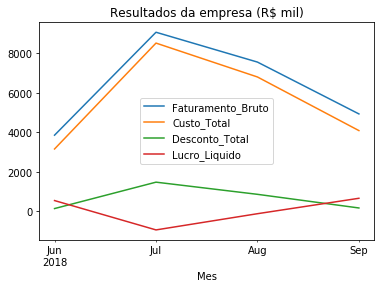

In [6]:
temp.plot(title='Resultados da empresa (R$ mil)')

Em junho, a empresa apresentou lucro líquido de R\\$ 551 mil, seguido de prejuízos em julho (-R\\$ 934 mil) e agosto (-R\\$ 113 mil), para uma recuperação no mês de setembro (R\\$ 667 mil). O resultado agregado no período foi positivo (R\\$ 171 mil).

Agora, vamos ver quais são os departamentos com maior faturamento e lucro, no somatório dos meses observados e dos produtos:

In [7]:
df.groupby(['Departamento'])['Faturamento_Bruto','Lucro_Liquido'].sum().round(2)

,Faturamento_Bruto,Lucro_Liquido
Departamento,,
Bolas de Gude,464448.7,111036.4
Cadeiras,6141458.0,-234484.0
Maquinas Fotogr ficas,18826450.0,294780.0


Vemos que, ao longo dos meses observados, o departamento de máquinas fotográficas obteve a maior rentabilidade, considerando todas as regiões e itens ofertados. Nota-se também que o setor de cadeiras apresentou prejuízos.

Agora, a evolução da performance mês a mês, na soma dos produtos:

In [8]:
temp = df.groupby(['Mes','Departamento'])['Faturamento_Bruto','Lucro_Liquido'].sum().round(2)
temp.unstack()

Faturamento_Bruto                                  Lucro_Liquido  \
Departamento     Bolas de Gude   Cadeiras Maquinas Fotogr ficas Bolas de Gude   
Mes                                                                             
2018-06-01             84315.5   868238.0             2908900.0       28395.0   
2018-07-01            155948.6  2431401.0             6484590.0       38980.2   
2018-08-01            130574.4  1792560.0             5638280.0       32044.8   
2018-09-01             93610.2  1049259.0             3794680.0       11616.4   

                                              
Departamento  Cadeiras Maquinas Fotogr ficas  
Mes                                           
2018-06-01    279796.0              243520.0  
2018-07-01   -214633.0             -758540.0  
2018-08-01   -329945.0              184480.0  
2018-09-01     30298.0              625320.0

Aqui é possível ver uma tendência do mercado em geral: percebe-se um aquecimento das vendas nos meses de julho e agosto. O departamento de bolas de gude apresentou um crescimento expressivo de junho para julho. Para ter uma melhor ideia da evolução dos indicadores, vejamos os dados em termos da variação em relação ao mês anterior (perde-se uma observação, pois não dispomos dos dados de maio):

In [9]:
temp2 = temp.unstack().pct_change()*100
temp2.round(2)

Faturamento_Bruto                                Lucro_Liquido  \
Departamento     Bolas de Gude Cadeiras Maquinas Fotogr ficas Bolas de Gude   
Mes                                                                           
2018-06-01                 NaN      NaN                   NaN           NaN   
2018-07-01               84.96   180.04                122.92         37.28   
2018-08-01              -16.27   -26.27                -13.05        -17.79   
2018-09-01              -28.31   -41.47                -32.70        -63.75   

                                             
Departamento Cadeiras Maquinas Fotogr ficas  
Mes                                          
2018-06-01        NaN                   NaN  
2018-07-01    -176.71               -411.49  
2018-08-01      53.73               -124.32  
2018-09-01    -109.18                238.96

Aqui percebem-se mais claramente as tendências de receitas. Para o faturamento bruto, observa-se um salto na variação de junho para julho, seguido de queda nos meses seguintes. Aqui, os setores de cadeiras e máquinas fotográficas merecem destaque, pois em alguns meses existe uma relação inversa entre o faturamento bruto e o lucro líquido dos departamentos. Isto sugere que precisamos analisar cuidadosamente a estrutura de custos e descontos destes setores, o que será feito adiante.

A seguir, veremos no gráfico a evolução desses indicadores:

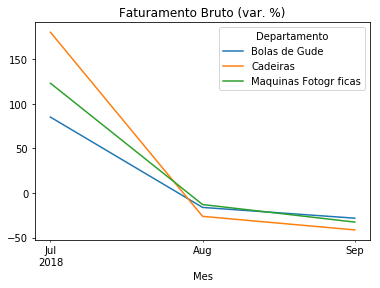

In [10]:
temp2['Faturamento_Bruto'].plot(title='Faturamento Bruto (var. %)')

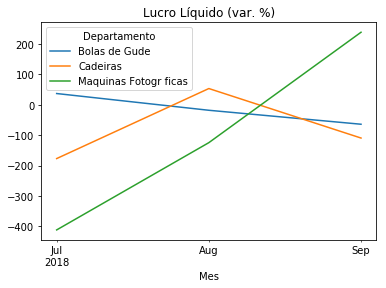

In [11]:
temp2['Lucro_Liquido'].plot(title='Lucro Líquido (var. %)')

Vamos analisar agora quais os itens mais rentáveis, em termos de lucro total ao longo do período:

In [12]:
temp = df.groupby(['Departamento','Item'])['Faturamento_Bruto','Lucro_Liquido'].sum().round(2)
temp

Faturamento_Bruto  Lucro_Liquido
Departamento          Item                                  
Bolas de Gude         1             170946.35        40743.7
                      2             154184.50        37215.0
                      3             139317.85        33077.7
Cadeiras              1            1946127.50        16035.0
                      2            2102926.50        22143.0
                      3            2092404.00      -272662.0
Maquinas Fotogr ficas 1            4103445.00      -244990.0
                      2            5514950.00        22120.0
                      3            9208055.00       517650.0

No total dos meses observados, os itens vendidos mais lucrativos foram:

- Bolas de gude: item 1
- Cadeiras: item 2
- Máquinas fotográficas: item 3

Agora, vamos ver no gráfico como andam as margens de lucro mínimas, médias e máximas para todo o período, de cada item:

In [13]:
temp = df.groupby(['Departamento','Item'])['Markup'].agg(['min','mean','max']).round(2)
temp

min   mean    max
Departamento          Item                     
Bolas de Gude         1      4.76  26.96  41.02
                      2      4.76  26.96  41.02
                      3      4.76  26.96  41.02
Cadeiras              1      3.77  18.87  40.99
                      2      5.26  20.11  40.76
                      3     -8.75   7.27  29.12
Maquinas Fotogr ficas 1    -11.11   2.95  14.67
                      2    -13.45   8.97  23.42
                      3      3.51  13.53  21.90

Calculando as margens médias, descobrimos que o departamento de bolas de gude exerce a mesma margem de lucro para todos os seus itens, que por sinal são as maiores dentro da empresa (aprox. 27%), embora tenha aplicado margens de até 41% sobre os itens.

O departamento de cadeiras exerce margens um pouco menores (entre 7% e 18%, na média), embora também tenha aplicado margens de quase 40% (itens 1 e 2). No caso do item 3, acende-se um sinal de alerta, com margens mínimas de -8%, ou seja, itens vendidos com preços vendidos abaixo dos custos.

O mesmo aconteceu no departamento de máquinas fotográficas para os itens 1 e 2. Em geral, as margens médias deste departamento são um pouco menores do que nos departamentos de bolas de gude e cadeiras. Anteriormente vimos a capacidade de faturamento deste departamento, portanto aqui percebe-se um potencial para aumento de preços, visando a saúde financeira da empresa.

Vamos ver a evolução dos dados acima no tempo, para as médias, no gráfico abaixo:

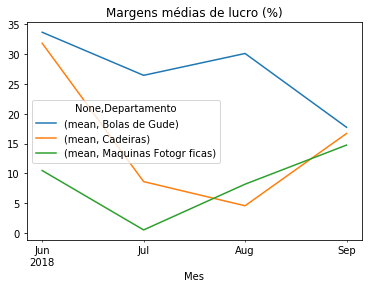

In [14]:
df.groupby(['Mes','Departamento'])['Markup'].agg(['mean']).unstack().plot(title='Margens médias de lucro (%)')

## Estrutura de custos

Estudar a estrutura de custos é vital para buscar novas estratégias de aumentar a rentabilidade da empresa: enquanto estratégias pelo lado da receita dependem da demanda dos consumidores, alguns cortes de custos podem ser realizadas (i) no curto prazo e (ii) dentro dos limites operacionais da empresa.

Primeiramente, vamos ver quais são os custos médios observados ao longo dos meses, de produto, frete e marketing, por departamento e item:

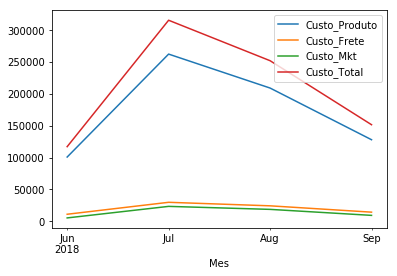

In [15]:
temp = df.groupby('Mes')['Custo_Produto','Custo_Frete','Custo_Mkt','Custo_Total']
temp.mean().plot(kind='line')

In [16]:
temp = df.groupby(['Departamento','Item'])['Custo_Produto','Custo_Frete','Custo_Mkt','Custo_Total','Custo_Marginal'].mean().round(2)
temp

Custo_Produto  Custo_Frete  Custo_Mkt  \
Departamento          Item                                          
Bolas de Gude         1           1628.33      7013.58    1497.42   
                      2           1445.08      6299.92    1365.00   
                      3           1330.75      5723.25    1222.25   
Cadeiras              1          69860.00     39945.00   23593.33   
                      2          88200.00     33567.50   20380.00   
                      3         120000.00     27325.00   17193.33   
Maquinas Fotogr ficas 1         285208.33     21691.67   22845.00   
                      2         376250.00     20070.00   21435.00   
                      3         632458.33     16920.83   17797.50   

                            Custo_Total  Custo_Marginal  
Departamento          Item                               
Bolas de Gude         1        10139.33           12.09  
                      2         9110.00           11.47  
                      3         8276.25           12.19  
Cadeiras              1       133398.33          226.70  
                      2       142147.50          282.74  
                      3       164518.33          403.79  
Maquinas Fotogr ficas 1       329745.00         1300.18  
                      2       417755.00         1785.14  
                      3       667176.67         3279.55

Os custos, em geral, são função da quantidade vendida de itens. O custo marginal, como exposto anteriormente, é uma métrica de custos que é ponderada pelas vendas. No departamento de bolas de gude, o item 3 foi o que apresentou o maior custo marginal. No departamento de cadeiras, o item 3 é o que apresentou o maior custo, e no departamento de máquinas fotográficas o item 3. Quaisquer estratégias de aumento de rentabilidade via redução de custos deve passar pelo estudo destes itens.

Todavia, nem sempre é possível fazer grandes intervenções nas negociações com fornecedores e custos de transporte: é preciso saber como cada etapa contribui sobre os custos totais. Vamos analisar em cada item a esta participação média de cada etapa dos custos sobre o total, em porcentagens:

In [17]:
temp = temp.reset_index()
temp['Produto pelo Total'] = temp.Custo_Produto / temp.Custo_Total * 100
temp['Frete pelo Total'] = temp.Custo_Frete / temp.Custo_Total * 100
temp['Mkt pelo Total'] = temp.Custo_Mkt / temp.Custo_Total * 100
temp.drop(['Custo_Produto','Custo_Frete','Custo_Mkt','Custo_Total','Custo_Marginal'], axis=1, inplace=True)
temp.round(3)

,Departamento,Item,Produto pelo Total,Frete pelo Total,Mkt pelo Total
0,Bolas de Gude,1,16.060,69.172,14.768
1,Bolas de Gude,2,15.863,69.154,14.984
2,Bolas de Gude,3,16.079,69.153,14.768
3,Cadeiras,1,52.369,29.944,17.686
4,Cadeiras,2,62.048,23.615,14.337
5,Cadeiras,3,72.940,16.609,10.451
6,Maquinas Fotogr ficas,1,86.494,6.578,6.928
7,Maquinas Fotogr ficas,2,90.065,4.804,5.131
8,Maquinas Fotogr ficas,3,94.796,2.536,2.668


Vimos anteriormente que no departamento de bolas de gude o item 3 possui os maiores custos marginais de comercialização. Dentro deste departamento como um todo, as estruturas de custo são similares, e o custo do frete é o principal fator (cerca de 69% do custo total). Tratando-se de um produto simples e barato, estratégias de otimização da logística podem trazer grandes contribuições para a rentabilidade do departamento como um todo.

No departamento de cadeiras, a distribuição é mais equilibrada e heterogênea: os custos de produto representam cerca de 60% dos custos totais. No caso do item 1, observam-se a maior fatia dos custos com marketing (aprox. 17%). A aplicação bem-sucedida dos dispêndios com marketing depende da propensão à vender dadas as visitas no site, ponto que será visto adiante.

No departamento de máquinas fotográficas, os custos de produto representam cerca de 90% dos custos totais, e os dispêndios com frete e marketing são baixos (cerca de 5% cada). Analisando o faturamento da nossa empresa, vimos que os itens do departamento de máquinas fotográficas são altamente lucrativos e de alto valor agregado. Aqui, negociações com fornecedores que reduzam o custo marginal dos itens trarão grandes benefícios para a empresa.

## Descontos, visitas e vendas

Os descontos representam uma peça-chave da estrutura de custos da empresa, pois com eles pode-se obter uma vantagem competitiva no mercado. Portanto, a análise aqui concentra-se não somente em verificar qual a contribuição dos descontos para a estrutura de custos totais da empresa, mas em como os descontos têm alavancado as vendas.

In [18]:
temp = df.groupby(['Departamento','Item'])['Desconto_Produto','Desconto_Frete','Desconto_Total','Vendas','Preco_Medio'].mean().reset_index().round(2)
temp.drop(['Vendas','Preco_Medio'], axis=1)

,Departamento,Item,Desconto_Produto,Desconto_Frete,Desconto_Total
0,Bolas de Gude,1,363.97,346.92,710.89
1,Bolas de Gude,2,333.93,303.53,637.46
2,Bolas de Gude,3,303.89,273.21,577.10
3,Cadeiras,1,22079.88,5362.83,27442.71
4,Cadeiras,2,26719.62,4531.50,31251.12
5,Cadeiras,3,28743.50,3827.00,32570.50
6,Maquinas Fotogr ficas,1,16527.92,16096.67,32624.58
7,Maquinas Fotogr ficas,2,24069.17,15911.67,39980.83
8,Maquinas Fotogr ficas,3,43622.92,13400.83,57023.75


Agora, podemos dividir os descontos por itens pelo respectivo volume de vendas, para descobrir qual têm sido o desconto necessário para vender uma unidade adicional de algum item, descritos pelas colunas `DescProd_Vendas`, `DescFret_Vendas` e `DescTot_Vendas`, que representam os descontos de produto, frete e total divididos pelas vendas, respectivamente. É possível ainda obter os descontos no preço médio dos itens em porcentagens através da relação:

$ \textrm{Desconto no preço} = \frac{\textrm{DescTot_Vendas}}{P_{médio}} * 100 $

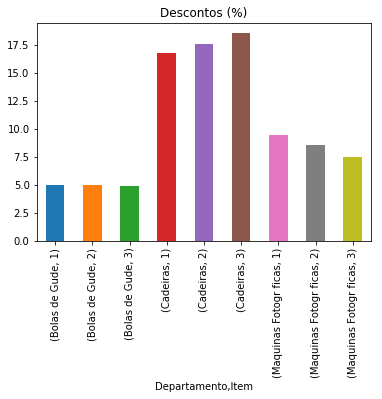

In [19]:
temp['DescProd_Vendas'] = temp.Desconto_Produto/temp.Vendas
temp['DescFret_Vendas'] = temp.Desconto_Frete/temp.Vendas
temp['DescTot_Vendas'] = temp.Desconto_Total/temp.Vendas
temp['Desconto_no_preco'] = temp.DescTot_Vendas/temp.Preco_Medio * 100

temp.drop(['Desconto_Produto','Desconto_Frete','Desconto_Total','Vendas','Preco_Medio'], axis=1, inplace=True)
temp.set_index(['Departamento','Item']).plot(y='Desconto_no_preco', kind='bar', legend=None, title='Descontos (%)')

De acordo com os dados observados, os descontos no departamento de bolas de gude giram em torno de 5%, com praticamente nenhuma diferenciação entre os itens. O departamento de cadeiras tem uma política de descontos mais agressiva, com descontos de 17% em média. Neste departamento existe uma diferenciação maior entre os itens, sendo que o item 3 foi o que acumulou mais descontos (18,5%). No departamento de máquinas fotográficas, os descontos médios estão na faixa de 8,5%, sendo o item 1 o que recebeu mais descontos totais (aprox. 9,5%). Precisamos ver o volume de vendas de cada item para saber se os descontos estão sendo bem aplicados.

Agora, vamos ver as métricas de vendas e visitas. Vamos ver como foi o tráfego no período analisado.

In [20]:
temp = df.groupby('Mes')['Visitas','Vendas'].sum()
temp
#temp.plot(kind='line', title='Visitas e vendas')

,Visitas,Vendas
Mes,,
2018-06-01,181075,8648
2018-07-01,181196,19520
2018-08-01,176556,15991
2018-09-01,180264,10484


De acordo com a tabela, ao longo dos meses de junho a setembro as visitas se mantém estáveis em torno de 180.000, enquanto as vendas começam em 8648 para mais que dobrar no mês de julho, para depois tomar uma tendência de queda nos meses seguintes. Dados de frequência diária poderiam revelar a influência de datas comemorativas no tráfego do site.

Podemos calcular a taxa de conversão dos itens através da relação:

$\textrm{Taxa de conversão} = \frac{\textrm{Vendas}}{\textrm{Visitas}} * 100$

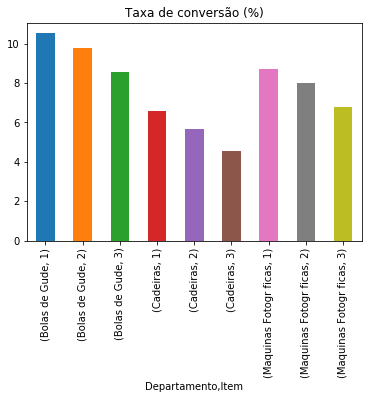

In [21]:
temp = df.groupby(['Departamento','Item'])['Visitas','Vendas','Custo_Mkt','Preco_Medio'].mean().round(2)
temp.reset_index()
temp['Taxa de conversão'] = temp.Vendas / temp.Visitas * 100

temp['Taxa de conversão'].plot(kind='bar', title='Taxa de conversão (%)')

Descobrimos que existe uma grande variabilidade entre os itens. No departamento de bolas de gude, o item 1 é o que possui a maior taxa de conversão (requer o menor número de visitas por venda) bem como o item 1 do setor de Cadeiras e o item 1 do setor de máquinas fotográficas. Estratégias de marketing que busquem aumentar a frequência dos consumidores na web podem focar nesses itens, pois requerem o menor investimento para alavancar vendas.

Sabe-se que os dispêndios com marketing objetivam ampliar as vendas dos itens oferecidos. Na tabela a seguir, calculamos a participação do custo médio de marketing no preço médio dos itens, calculando o gasto médio por item em marketing (representado pela coluna `Custo_Mkt_Vendas`), e em seguida a participação desse custo no preço médio dos itens, através das relações:

$\textrm{Custo_Mkt_Vendas} = \frac{C_{mkt}}{\textrm{Vendas}}$

$\textrm{Custo_Mkt_Preço} = \frac{\textrm{Custo_Mkt_Vendas}}{P_{médio}}$

In [22]:
temp['Custo_Mkt_Vendas'] = temp.Custo_Mkt / temp.Vendas
temp['Custo_Mkt_Preço'] = temp.Custo_Mkt_Vendas / temp.Preco_Medio * 100
temp.drop(['Visitas','Vendas','Custo_Mkt','Preco_Medio'], axis=1).round(2)

Taxa de conversão  Custo_Mkt_Vendas  \
Departamento          Item                                        
Bolas de Gude         1                 10.52              1.72   
                      2                  9.80              1.70   
                      3                  8.58              1.72   
Cadeiras              1                  6.59             40.71   
                      2                  5.66             41.07   
                      3                  4.55             43.15   
Maquinas Fotogr ficas 1                  8.69             89.38   
                      2                  8.03             90.80   
                      3                  6.79             88.14   

                            Custo_Mkt_Preço  
Departamento          Item                   
Bolas de Gude         1               10.41  
                      2               10.75  
                      3               10.37  
Cadeiras              1               14.47  
                      2               11.47  
                      3                9.80  
Maquinas Fotogr ficas 1                6.61  
                      2                4.59  
                      3                2.33

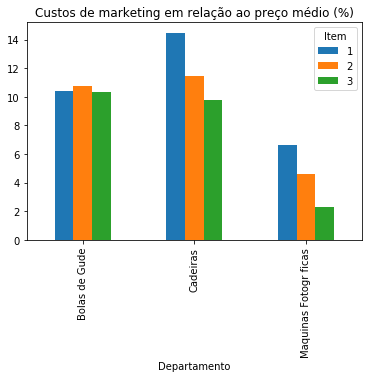

In [23]:
temp.unstack()['Custo_Mkt_Preço'].plot(kind='bar', title='Custos de marketing em relação ao preço médio (%)')

A partir dos dados calculados, vemos que no departamento de bolas de gude os gastos com marketing chegam ao redor de 10,5% em média. No departamento de cadeiras, esse número alcança aproximadamente 12%. O item 1 recebe o maior gasto em marketing (14,4%). O departamento de máquinas fotográficas é o que possui os menores gastos médios (4,5%).

## Análise regional

Nesta seção avaliaremos diferenças regionais nas principais métricas de desempenho da empresa. Vamos mostrar primeiro os preços, custos marginais e margens de lucro médias:

In [24]:
temp = df.groupby(['UF','Departamento','Item'])['Preco_Medio','Custo_Marginal','Markup',].mean().round(2)
temp

Preco_Medio  Custo_Marginal  Markup
UF Departamento          Item                                     
MT Bolas de Gude         1           17.75           15.26   14.03
                         2           15.12           13.03   14.03
                         3           17.89           15.45   14.03
   Cadeiras              1          271.16          220.83   18.58
                         2          345.75          275.56   19.30
                         3          421.02          392.71    5.86
   Maquinas Fotogr ficas 1         1400.65         1361.26    2.40
                         2         1828.76         1909.82   -4.67
                         3         3360.61         2956.03   12.49
PE Bolas de Gude         1           18.05           11.70   35.07
                         2           18.15           11.78   35.07
                         3           18.11           11.75   35.07
   Cadeiras              1          282.86          242.73   13.52
                         2          355.98          298.36   15.34
                         3          436.64          421.18    2.64
   Maquinas Fotogr ficas 1         1208.30         1200.00   -0.76
                         2         2098.28         1733.88   17.45
                         3         4101.21         3663.38   10.64
SP Bolas de Gude         1           13.70            9.30   31.79
                         2           14.12            9.61   31.79
                         3           13.83            9.37   31.79
   Cadeiras              1          289.90          216.53   24.50
                         2          372.32          274.29   25.70
                         3          463.33          397.47   13.32
   Maquinas Fotogr ficas 1         1450.30         1339.26    7.22
                         2         2006.28         1711.73   14.13
                         3         3907.90         3219.24   17.47

Percebe-se que alguns departamentos desempenham melhor em determinadas regiões. No Mato Grosso, as margens médias estão abaixo da média da empresa, sobretudo no departamento de máquinas fotográficas, que opera aproximadamente à preço de custo. O estado de Pernambuco apresenta ótimas margens no departamento de bolas de gude, enquanto que no departamento de cadeiras as margens estão abaixo da média. São Paulo apresenta as melhores margens no departamento de cadeiras e máquinas fotográficas. Nota-se a necessidade, em alguns itens, de reajuste de preços de produtos ou fretes (ou ainda, redução de descontos).

A seguir, o somatório das vendas e do lucro líquido no período:

In [25]:
temp = df.groupby(['UF','Departamento'])['Vendas','Lucro_Liquido',].sum().round(2)
temp

Vendas  Lucro_Liquido
UF Departamento                                
MT Bolas de Gude            6803        10241.4
   Cadeiras                 2634       -48790.0
   Maquinas Fotogr ficas    2194      -180710.0
PE Bolas de Gude           11321        61403.0
   Cadeiras                 4976      -195161.0
   Maquinas Fotogr ficas    2061       -10480.0
SP Bolas de Gude           10505        39392.0
   Cadeiras                10081         9467.0
   Maquinas Fotogr ficas    4068       485970.0

Aqui emergem as diferenças de desempenho dos departamentos, nas diferentes localidades. Em Pernambuco, novamente o departamento de bolas de gude se destaca, bem como um desempenho no departamento de cadeiras melhor do que no Mato Grosso. O estado de São Paulo, dotado de um grande mercado consumidor, vendeu quase o mesmo em máquinas fotográficas que nos dois outros estados, para um lucro de quase R\\$ 500 mil. Ademais, novamente mostra seu potencial no departamento de cadeiras.

É intuitivo imaginar que a rentabilidade dos fretes sejam sensíveis à localização dos consumidores. Seguem os resultados do lucro médio dos fretes em cada região e departamento, dividido pelas vendas:

In [26]:
temp = df.groupby(['UF','Departamento'])['Lucro_Frete','Vendas'].mean().reset_index().round(2)
temp['Lucro_Frete_Ponderado'] = temp.Lucro_Frete / temp.Vendas
temp.drop(['Lucro_Frete','Vendas'], axis=1, inplace=True)
temp.round(2)

,UF,Departamento,Lucro_Frete_Ponderado
0,MT,Bolas de Gude,1.09
1,MT,Cadeiras,-6.63
2,MT,Maquinas Fotogr ficas,-72.44
3,PE,Bolas de Gude,3.17
4,PE,Cadeiras,-6.89
5,PE,Maquinas Fotogr ficas,-150.63
6,SP,Bolas de Gude,2.24
7,SP,Cadeiras,2.50
8,SP,Maquinas Fotogr ficas,-122.03


Pode-se interpretar essa relação como um índice. Analisando os dados da tabela, nota-se que cada estado tem vantagens comparativas na parte logística, de acordo com cada departamento. Uma análise prévia não encontrou diferenças significativas entre itens de um mesmo departamento. No Mato Grosso, as perdas com frete são menores no departamento de máquinas fotográficas. Em Pernambuco, as vantagens aparecem no departamento de bolas de gude. O estado de São Paulo apresenta bons números em geral, e mais uma vez mostrando vantagens comparativas no departamento de cadeiras. É provável que aqui se encontre algum centro de distribuição destes itens.

Os números apresentados nesta seção revelam a importância da logística no funcionamento da empresa, sobretudo para os itens de aparentemente difícil transporte como os do departamento de cadeiras e máquinas fotográficas.